## **Federated Learning for Situation Recognition Using Wearable and Contextual Data**"

## 🧠 Project Overview

This project implements a personalized Federated Learning (FL) framework for **Situation Recognition** using data collected from **wearable devices and smartphone sensors**. The system aims to detect user situations (e.g., walking, working, relaxing) by training models locally on user data and aggregating them globally without violating privacy.

The project explores four FL algorithms:
- **FedAvg** – classic averaging-based FL
- **FedProx** – adds a proximal term to handle client drift
- **FedPer** – separates global and private layers for personalization
- **GTVMin** – introduces a graph-based smoothness penalty using client similarity

## 🎯 Objectives

- Recognize human **Situations** across 60 users based on multimodal features (sensor + context)
- Ensure **data privacy** by training models **locally**
- Improve **personalization** using graph-based total variation minimization (GTVMin)
- Analyze trade-offs between **accuracy**, **federated personalization**, and **communication cost**

## 🗃️ Dataset

- Custom preprocessed CSV file: `activity+situation+Federated_clean.csv`
- Contains:
  - **Sensor features** (e.g., accelerometer, gyroscope, magnetometer)
  - **Contextual features** (e.g., time, location, device usage)
  - **Labels**: `Activity` and `Situation`
  - **60 unique users** (clients)

## 🧪 Experiments

- Data preprocessing and normalization per client
- Label encoding for Activity and Situation
- Train/test split locally per user
- Implemented and compared:
  - **Per-client accuracy, precision, recall, F1-score**
  - **Per-situation performance**
  - **Communication cost estimation**
  - **Client similarity graph visualization**

## 📊 Key Insights

- GTVMin outperformed FedAvg and FedProx in best-client F1-score (up to **55%**)
- Personalized heads in FedPer underperformed due to small client data
- GTVMin helped **smooth model weights** across similar clients using a **cosine similarity graph**
- Communication cost remained reasonable for all methods

## 📈 Visualizations

- Client similarity graph with colored nodes/edges
- Per-situation F1-score comparison across FL algorithms
- Top-5 best performing clients per method
- Communication cost per algorithm (MB)

## 📌 Conclusion

GTVMin improves personalization in situation-aware wearables by leveraging **structural similarities** between users. This approach is highly relevant for **privacy-preserving, scalable, and adaptive learning** in smart healthcare, fitness, and behavior modeling applications.

Reagrding Code:
##################################
# 1. Define the Local Model (MLP)
#################################

########################################
# 2. Compute Behavioral Similarity Graph
########################################

#######################################
# 3. Helper: FedAvg + FedProx + GTVMin
#######################################
#################################
# 4. Federated Learning Rounds
#################################
---



In [90]:
from google.colab import drive # First task is completed one step approach followed in this file excluding the conetxt fetaures now i am thnking about  the feedback, context features, adaptive, choosing of smartphone and smatwatch, fuzzy and ANFISssystem
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
import os
os.chdir('/content/drive/MyDrive/Situation_aware_federated')
!ls -a

activity+situation+Federated_clean.csv
activity+situation+Federated.csv
best_clients_per_method.csv
filtered_sensors_labels_clean_relevant.csv


## **1 Data Preprocessing**

In [ ]:
import pandas as pd

# Load the CSV file
file_path = 'filtered_sensors_labels_clean_relevant.csv'
df = pd.read_csv(file_path)



In [ ]:
df

,Unnamed: 0,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,discrete:app_state,discrete:battery_plugged,discrete:battery_state,discrete:on_the_phone,discrete:ringer_mode,discrete:wifi_status,discrete:time_of_day,ID,Activity,Situation
0,0,0.029559,0.002614,0.002367,0.004291,0.027878,0.029398,0.031153,2.021571,6.680757,...,3,1,4,0,2,1,3,BEF6C611-50DA-4971-A040-87FB979F3FC1,SITTING,SITTING-TALKING
1,1,0.407494,0.026980,0.026967,0.044254,0.390988,0.402351,0.423457,1.993280,6.682458,...,3,1,4,0,2,1,3,BEF6C611-50DA-4971-A040-87FB979F3FC1,SITTING,SITTING-TALKING
2,2,0.531882,0.055517,-0.029468,0.079983,0.500823,0.539898,0.572079,2.112957,6.679098,...,3,1,4,0,2,1,3,BEF6C611-50DA-4971-A040-87FB979F3FC1,SITTING,SITTING-TALKING
3,3,0.509414,0.031286,0.018415,0.039291,0.483606,0.507893,0.534241,2.598104,6.682731,...,3,1,4,0,2,1,3,BEF6C611-50DA-4971-A040-87FB979F3FC1,SITTING,SITTING-TALKING
4,4,0.031195,0.008361,0.016372,0.025226,0.027872,0.030069,0.032430,1.076102,6.659581,...,3,1,4,0,2,1,3,BEF6C611-50DA-4971-A040-87FB979F3FC1,SITTING,SITTING-TALKING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151880,177000,0.999305,0.002563,0.002573,0.003557,0.997574,0.998684,1.000374,2.394814,6.684608,...,2,3,1,0,3,1,3,2C32C23E-E30C-498A-8DD2-0EFB9150A02E,SITTING,SITTING-COMPUTER_WORK
151881,177001,0.999728,0.004050,0.004470,0.005554,0.997166,0.998171,1.000038,2.341425,6.684604,...,2,3,1,0,3,1,3,2C32C23E-E30C-498A-8DD2-0EFB9150A02E,SITTING,SITTING-COMPUTER_WORK
151882,177002,1.003939,0.004163,0.004493,0.007552,1.000976,1.002881,1.007417,1.753640,6.684603,...,2,3,1,0,3,1,3,2C32C23E-E30C-498A-8DD2-0EFB9150A02E,SITTING,SITTING-COMPUTER_WORK
151883,177003,0.998339,0.002018,0.001911,0.003488,0.997280,0.998137,0.999055,1.887890,6.684610,...,2,3,1,0,3,1,3,2C32C23E-E30C-498A-8DD2-0EFB9150A02E,SITTING,SITTING-COMPUTER_WORK


In [ ]:
df.shape

(151885, 135)

## Summary of Activities

In [ ]:
import pandas as pd

# Load the cleaned dataset
file_path = 'activity+situation+Federated_clean.csv'
df = pd.read_csv(file_path)

# Create pivot table: rows = ID, columns = Activity, values = count
activity_summary = df.pivot_table(index='ID',
                                   columns='Activity',
                                   aggfunc='size',
                                   fill_value=0)

# Reset index to make 'ID' a column again
activity_summary = activity_summary.reset_index()

# Display the result
print("Activity count summary per user:")
print(activity_summary)

# Optional: Save to CSV
#activity_summary.to_csv('activity_summary_per_user.csv', index=False)


Activity count summary per user:
Activity  ID  LYING  RUNNING  SITTING  STANDING  WALKING
0          1    479        0       89        17       19
1          2   1817       33     1284        51        0
2          3   1145        7      365        52       37
3          4      0       35      546        33        0
4          5   1451        0     1275       240      434
5          6    655        1      482        70      127
6          7   2639        0      603       259       36
7          8    876        0      524        85      100
8          9   2213        0     1155       289        8
9         10   1444       30     2117       319      263
10        11      1        0      690       585      129
11        12   1115        0      201        16       68
12        13   2328        0      953        45      130
13        14   1737        0      662       113        0
14        15   1098        0      184       205        0
15        16   1183        4      504       364        

## Summary of Sitautions with respect to each user

In [ ]:
import pandas as pd

# Load the cleaned dataset
file_path = 'activity+situation+Federated_clean.csv'
df = pd.read_csv(file_path)

# Pivot table: rows = ID, columns = Activity, values = counts
activity_summary = df.pivot_table(index='ID',
                                   columns='Activity',
                                   aggfunc='size',
                                   fill_value=0).reset_index()

# Pivot table: rows = ID, columns = Situation, values = counts
situation_summary = df.pivot_table(index='ID',
                                   columns='Situation',
                                   aggfunc='size',
                                   fill_value=0).reset_index()

# Display results
print("✅ Activity count summary per user:")
print(activity_summary)

print("\n✅ Situation count summary per user:")
print(situation_summary)

# Optional: Save both to CSV
# activity_summary.to_csv('activity_summary_per_user.csv', index=False)
# situation_summary.to_csv('situation_summary_per_user.csv', index=False)


✅ Activity count summary per user:
Activity  ID  LYING  RUNNING  SITTING  STANDING  WALKING
0          1    479        0       89        17       19
1          2   1817       33     1284        51        0
2          3   1145        7      365        52       37
3          4      0       35      546        33        0
4          5   1451        0     1275       240      434
5          6    655        1      482        70      127
6          7   2639        0      603       259       36
7          8    876        0      524        85      100
8          9   2213        0     1155       289        8
9         10   1444       30     2117       319      263
10        11      1        0      690       585      129
11        12   1115        0      201        16       68
12        13   2328        0      953        45      130
13        14   1737        0      662       113        0
14        15   1098        0      184       205        0
15        16   1183        4      504       364      

## Analysis of Situations with respect to Client

In [ ]:
import pandas as pd

# Load the cleaned dataset
file_path = 'activity+situation+Federated_clean.csv'
df = pd.read_csv(file_path)

# Create pivot table: rows = ID, columns = Activity, values = counts
activity_summary = df.pivot_table(index='ID',
                                   columns='Activity',
                                   aggfunc='size',
                                   fill_value=0)

# Add a 'Total' column summing across all activities
activity_summary['Total'] = activity_summary.sum(axis=1)

# Sort users by total activity count (ascending)
low_activity_users = activity_summary.sort_values(by='Total').reset_index()

# Display users with the lowest activity counts
print("👥 Users with the lowest total activity counts:")
print(low_activity_users.head(10))  # Change the number to show more or fewer users

# Optional: Save to CSV
# low_activity_users.to_csv('low_activity_users.csv', index=False)


👥 Users with the lowest total activity counts:
Activity  ID  LYING  RUNNING  SITTING  STANDING  WALKING  Total
0         60     15        0      255         0        0    270
1         49      0        0      200        78        0    278
2         32      0        0      312         0        0    312
3         30      0      283       44         0        0    327
4         58     25        0      376         7       10    418
5         59    235       12      204         0       26    477
6         22     63        9      511         0        0    583
7          1    479        0       89        17       19    604
8         50     77        0      518         9        0    604
9          4      0       35      546        33        0    614


## Feature Engineering and Selection of Nodes

In [98]:
# Federated Learning Comparison: FedAvg, FedProx, FedPer, GTVMin

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv("activity+situation+Federated_clean.csv")

# Extract columns
sensor_cols = df.loc[:, 'raw_acc:magnitude_stats:mean':'raw_magnet:avr_cosine_similarity_lag_range4'].columns.tolist()
context_cols = df.loc[:, 'location:num_valid_updates':'discrete:time_of_day'].columns.tolist()

# Encode labels
label_enc_act = LabelEncoder().fit(df['Activity'].dropna())
label_enc_sit = LabelEncoder().fit(df['Situation'].dropna())

# Prepare per-client data
clients_data = {}
user_ids = df['ID'].unique()
for uid in user_ids:
    user_df = df[df['ID'] == uid].dropna(subset=sensor_cols + context_cols + ['Activity', 'Situation'])
    if len(user_df) < 20:
        continue
    sensor = StandardScaler().fit_transform(user_df[sensor_cols])
    context = StandardScaler().fit_transform(user_df[context_cols])
    activity = label_enc_act.transform(user_df['Activity'])
    situation = label_enc_sit.transform(user_df['Situation'])
    clients_data[f'client_{uid}'] = {
        'sensor': sensor,
        'context': context,
        'activity': activity,
        'situation': situation
    }

# Create DataLoaders
client_loaders = {}
for uid, data in clients_data.items():
    X = np.hstack([data['sensor'], data['context']])
    y = data['situation']
    dataset = TensorDataset(torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long))
    client_loaders[uid] = DataLoader(dataset, batch_size=32, shuffle=True)

print(f"✅ Total clients loaded and preprocessed: {len(clients_data)}")
print(f"📊 Example client data keys: {list(clients_data['client_' + str(user_ids[0])].keys())}")



✅ Total clients loaded and preprocessed: 60
📊 Example client data keys: ['sensor', 'context', 'activity', 'situation']


## Model definitions

In [99]:
# Model definitions
class FedAvgMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(FedAvgMLP, self).__init__()
        self.model = nn.Sequential(
             nn.Linear(input_dim, hidden_dim),
             nn.ReLU(),
             nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x):
        return self.model(x)

class FedPerModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(FedPerModel, self).__init__()
        self.shared = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU()
        )
        self.local = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        features = self.shared(x)
        return self.local(features)

    def get_shared_params(self):
        return self.shared.state_dict()

    def set_shared_params(self, state_dict):
        self.shared.load_state_dict(state_dict)


## Evaluation

In [100]:

def evaluate_model(model, dataloader):
    model.eval()
    all_preds, all_targets = [], []
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            preds = torch.argmax(model(X_batch), dim=1)
            all_preds.extend(preds.numpy())
            all_targets.extend(y_batch.numpy())
    acc = accuracy_score(all_targets, all_preds)
    return acc

## Training function with optional FedProx loss

In [101]:
def local_train(model, dataloader, global_weights=None, mu=0, lr=0.05, epochs=1):
    model.train()
    opt = torch.optim.SGD(model.parameters(), lr=lr)
    # Class imbalance handling
    #weights = get_class_weights(dataloader)
    #loss_fn = nn.CrossEntropyLoss(weight=weights)
    loss_fn = nn.CrossEntropyLoss()
    epoch_losses = []
    for _ in range(epochs):
        batch_losses = []
        for X_batch, y_batch in dataloader:
            opt.zero_grad()
            logits = model(X_batch)
            loss = loss_fn(logits, y_batch)
            if global_weights:
                for name, param in model.named_parameters():
                    loss += (mu / 2) * torch.norm(param - global_weights[name])**2
            loss.backward()
            opt.step()
            batch_losses.append(loss.item())
        epoch_losses.append(np.mean(batch_losses))
    return np.mean(epoch_losses)

## Build graph

In [102]:

def build_similarity_graph(clients_data, k=5):
    G = nx.Graph()
    emb = {uid: np.mean(np.hstack([d['sensor'], d['context']]), axis=0) for uid, d in clients_data.items()}
    ids, vecs = list(emb.keys()), np.array(list(emb.values()))
    sims = cosine_similarity(vecs)
    for i, uid in enumerate(ids):
        G.add_node(uid)
        top_k = np.argsort(sims[i])[-k-1:-1]
        for j in top_k:
            G.add_edge(uid, ids[j], weight=sims[i, j])
    return G

def gtv_min_update(local_models, G, lam=0.1):
    for uid in local_models:
        w_i = local_models[uid].state_dict()
        for v in G.neighbors(uid):
            w_j = local_models[v].state_dict()
            for k in w_i:
                w_i[k] = w_i[k] - lam * (w_i[k] - w_j[k])
        local_models[uid].load_state_dict(w_i)

# Initialize
uid0 = list(clients_data.keys())[0]
input_dim = clients_data[uid0]['sensor'].shape[1] + clients_data[uid0]['context'].shape[1]
hidden_dim = 64
num_classes = len(label_enc_sit.classes_)

results = {'FedAvg': {}, 'FedProx': {}, 'FedPer': {}, 'GTVMin': {}}
loss_histories = {'FedAvg': [], 'FedProx': [], 'FedPer': [], 'GTVMin': []}
num_rounds = 10

Client Similarity Graph Visualization

<ipython-input-121-1d6f8532e46c>:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_nodes = cm.get_cmap('tab20', len(communities))


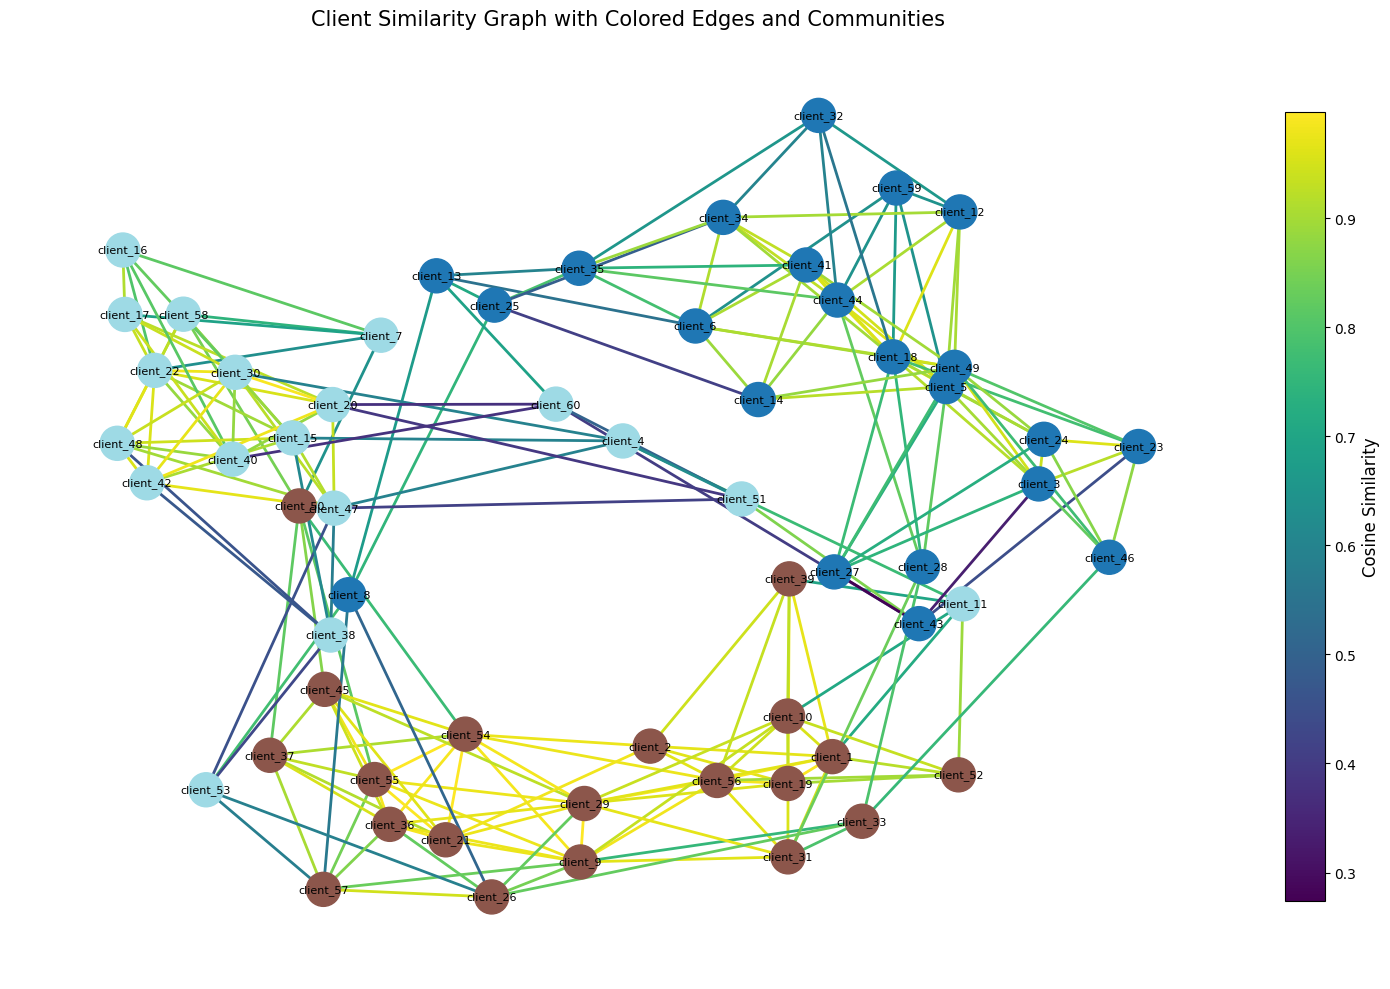

In [121]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import cm, colors
from networkx.algorithms.community import greedy_modularity_communities

# Step 1: Client embeddings
client_ids = list(clients_data.keys())
client_embeddings = {
    uid: np.mean(np.hstack([clients_data[uid]['sensor'], clients_data[uid]['context']]), axis=0)
    for uid in client_ids
}
emb_matrix = np.array(list(client_embeddings.values()))
similarity_matrix = cosine_similarity(emb_matrix)

# Step 2: Build top-k similarity graph
k = 5
G = nx.Graph()
for i, uid_i in enumerate(client_ids):
    G.add_node(uid_i)
    top_k_indices = np.argsort(similarity_matrix[i])[-k-1:-1]
    for j in top_k_indices:
        uid_j = client_ids[j]
        sim = similarity_matrix[i, j]
        G.add_edge(uid_i, uid_j, weight=sim)

# Step 3: Community coloring
communities = list(greedy_modularity_communities(G))
cmap_nodes = cm.get_cmap('tab20', len(communities))
node_color_map = {node: cmap_nodes(i) for i, comm in enumerate(communities) for node in comm}
node_colors = [node_color_map[node] for node in G.nodes]

# Step 4: Edge coloring by similarity
edge_weights = [d['weight'] for (_, _, d) in G.edges(data=True)]
norm = colors.Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
cmap_edges = cm.viridis
edge_colors = [cmap_edges(norm(w)) for w in edge_weights]

# ✅ Step 5: Create figure and axis explicitly
fig, ax = plt.subplots(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42, k=0.5)

# Draw graph
nx.draw_networkx_nodes(G, pos, node_size=600, node_color=node_colors, ax=ax)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_colors, width=2, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)

# Add colorbar for edge weights
sm = plt.cm.ScalarMappable(cmap=cmap_edges, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.03)
cbar.set_label('Cosine Similarity', fontsize=12)

ax.set_title("Client Similarity Graph with Colored Edges and Communities", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()


## FedAvg

In [103]:

model_fedavg = FedAvgMLP(input_dim, hidden_dim, num_classes)
for rnd in range(num_rounds):
    local_models = {}
    round_loss = 0
    for uid in client_loaders:
        model = FedAvgMLP(input_dim, hidden_dim, num_classes)
        model.load_state_dict(model_fedavg.state_dict())
        loss = local_train(model, client_loaders[uid], lr=0.05, epochs=1)
        round_loss += loss
        local_models[uid] = model
    for k in model_fedavg.state_dict():
        model_fedavg.state_dict()[k].copy_(torch.stack([m.state_dict()[k] for m in local_models.values()]).mean(0))
    loss_histories['FedAvg'].append(round_loss / len(client_loaders))
for uid in client_loaders:
    results['FedAvg'][uid] = evaluate_model(model_fedavg, client_loaders[uid])


## FedProx

In [104]:

model_fedprox = FedAvgMLP(input_dim, hidden_dim, num_classes)
for rnd in range(num_rounds):
    local_models = {}
    global_weights = {k: v.clone() for k, v in model_fedprox.state_dict().items()}
    round_loss = 0
    for uid in client_loaders:
        model = FedAvgMLP(input_dim, hidden_dim, num_classes)
        model.load_state_dict(model_fedprox.state_dict())
        loss = local_train(model, client_loaders[uid], global_weights=global_weights, mu=0.1, lr=0.05, epochs=1)
        round_loss += loss
        local_models[uid] = model
    for k in model_fedprox.state_dict():
        model_fedprox.state_dict()[k].copy_(torch.stack([m.state_dict()[k] for m in local_models.values()]).mean(0))
    loss_histories['FedProx'].append(round_loss / len(client_loaders))
for uid in client_loaders:
    results['FedProx'][uid] = evaluate_model(model_fedprox, client_loaders[uid])

##  FedPer

In [105]:
model_shared = FedPerModel(input_dim, hidden_dim, num_classes)
for rnd in range(num_rounds):
    round_loss = 0
    for uid in client_loaders:
        model = FedPerModel(input_dim, hidden_dim, num_classes)
        model.set_shared_params(model_shared.get_shared_params())
        loss = local_train(model, client_loaders[uid], lr=0.05, epochs=1)
        round_loss += loss
        model_shared.set_shared_params(model.get_shared_params())
    loss_histories['FedPer'].append(round_loss / len(client_loaders))
for uid in client_loaders:
    model = FedPerModel(input_dim, hidden_dim, num_classes)
    model.set_shared_params(model_shared.get_shared_params())
    local_train(model, client_loaders[uid], lr=0.05, epochs=5)
    results['FedPer'][uid] = evaluate_model(model, client_loaders[uid])

## GTVMin

In [106]:
G = build_similarity_graph(clients_data, k=5)
local_models_gtv = {uid: FedAvgMLP(input_dim, hidden_dim, num_classes) for uid in client_loaders}
for rnd in range(num_rounds):
    round_loss = 0
    for uid in local_models_gtv:
        loss = local_train(local_models_gtv[uid], client_loaders[uid], lr=0.05, epochs=1)
        round_loss += loss
    gtv_min_update(local_models_gtv, G, lam=0.1)
    loss_histories['GTVMin'].append(round_loss / len(local_models_gtv))
for uid in client_loaders:
    results['GTVMin'][uid] = evaluate_model(local_models_gtv[uid], client_loaders[uid])

## Loss Tracking per Round for GTVMin

1.   List item
2.   List item



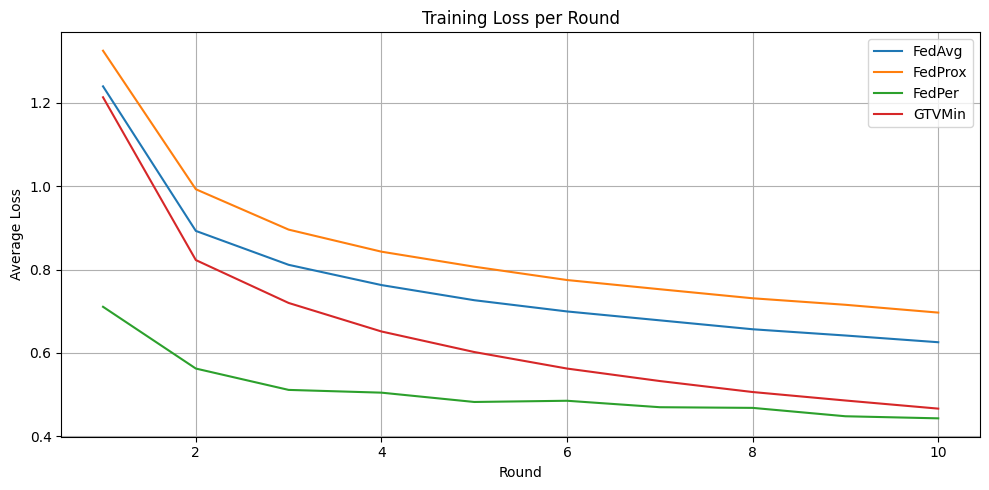

In [107]:
# Plot training loss curves
plt.figure(figsize=(10, 5))
for method, losses in loss_histories.items():
    plt.plot(range(1, num_rounds+1), losses, label=method)
plt.title("Training Loss per Round")
plt.xlabel("Round")
plt.ylabel("Average Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




## Heatmap of the Client Similarity Graph

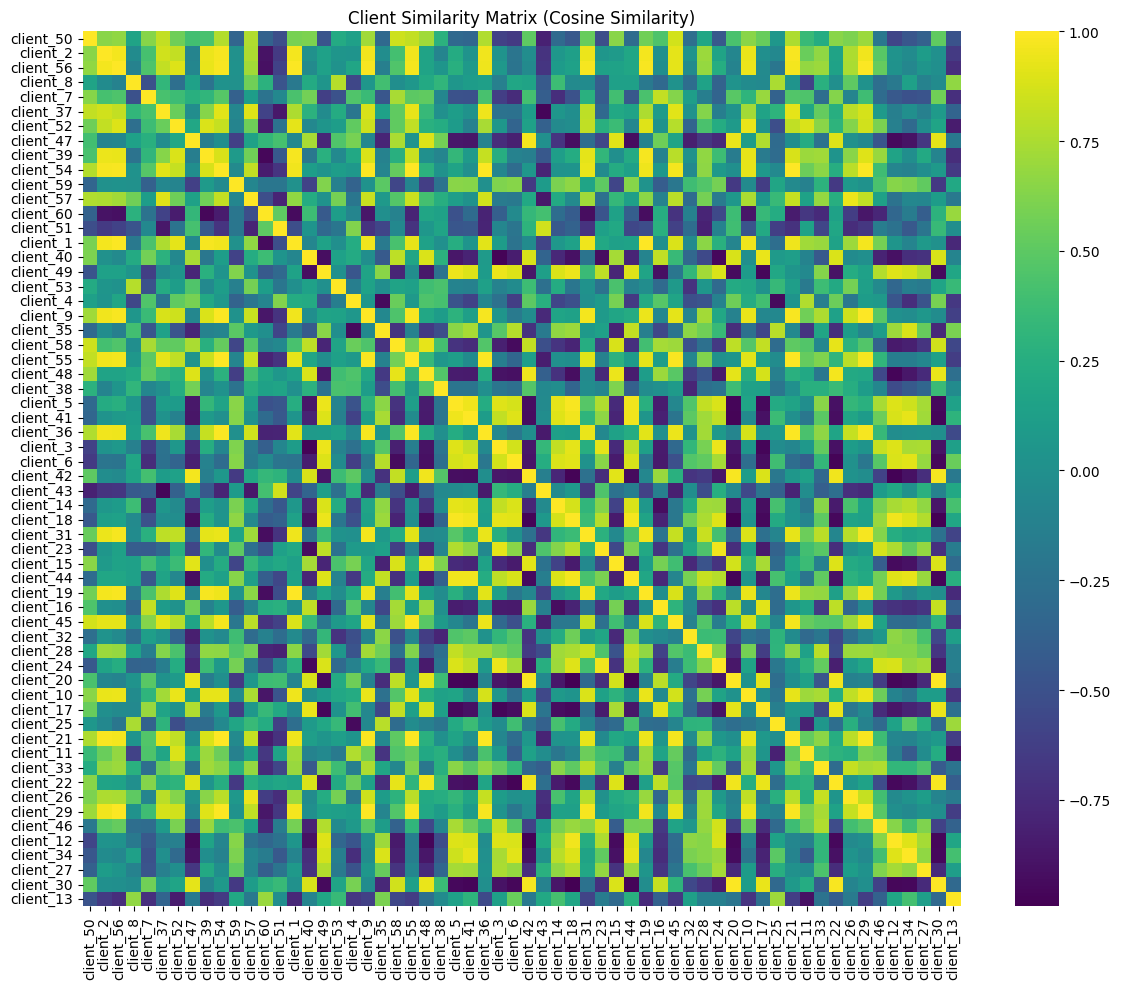

In [108]:
# Plot client similarity heatmap
client_ids = list(clients_data.keys())
embeddings = np.array([
    np.mean(np.hstack([clients_data[uid]['sensor'], clients_data[uid]['context']]), axis=0)
    for uid in client_ids
])
similarity_matrix = cosine_similarity(embeddings)
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, xticklabels=client_ids, yticklabels=client_ids, cmap="viridis")
plt.title("Client Similarity Matrix (Cosine Similarity)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Per-Client Accuracy Comparison across global models



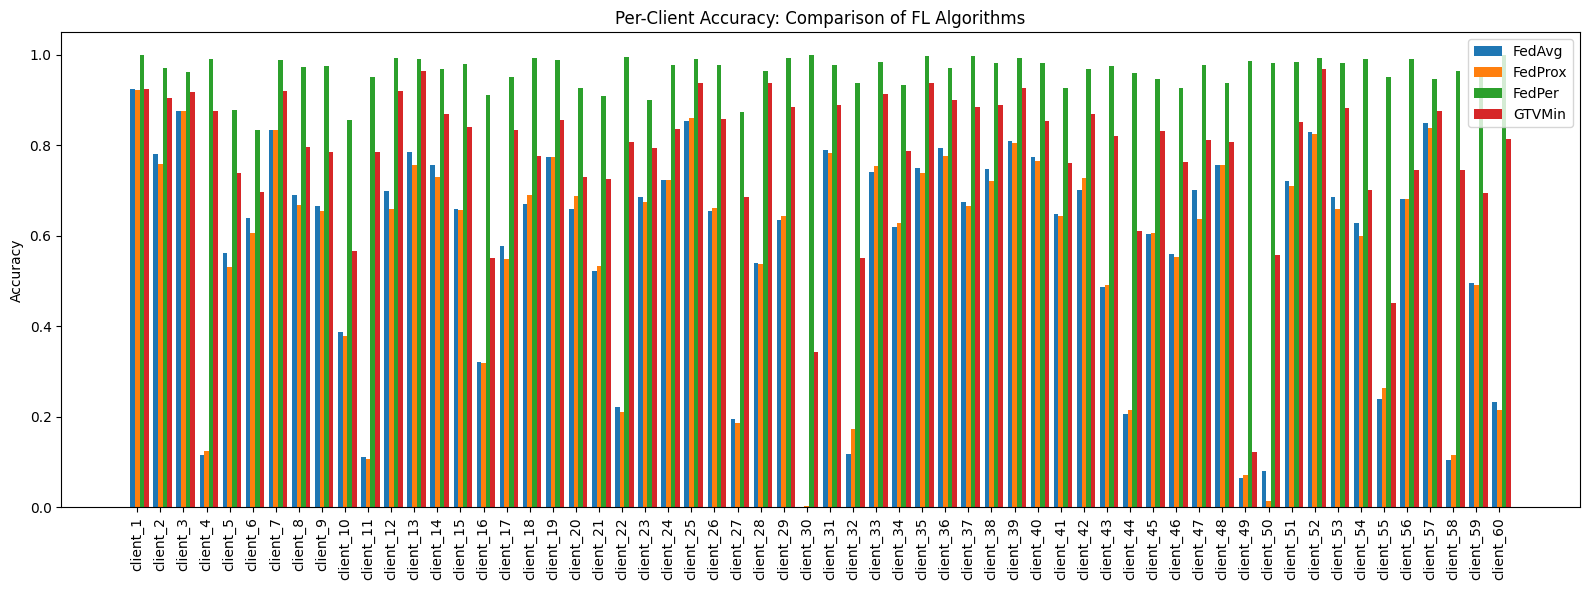

In [109]:
# Plotting comparison
uids_sorted = sorted(client_loaders.keys(), key=lambda x: int(x.split('_')[1]))
x = np.arange(len(uids_sorted))
bar_width = 0.2

plt.figure(figsize=(16, 6))
for i, method in enumerate(results):
    vals = [results[method][uid] for uid in uids_sorted]
    plt.bar(x + i * bar_width, vals, bar_width, label=method)

plt.xticks(x + bar_width, uids_sorted, rotation=90)
plt.ylabel('Accuracy')
plt.title('Per-Client Accuracy: Comparison of FL Algorithms')
plt.legend()
plt.tight_layout()
plt.show()

## Per-Client Accuracy Comparison: Global vs Local Models (All 4 Methods)

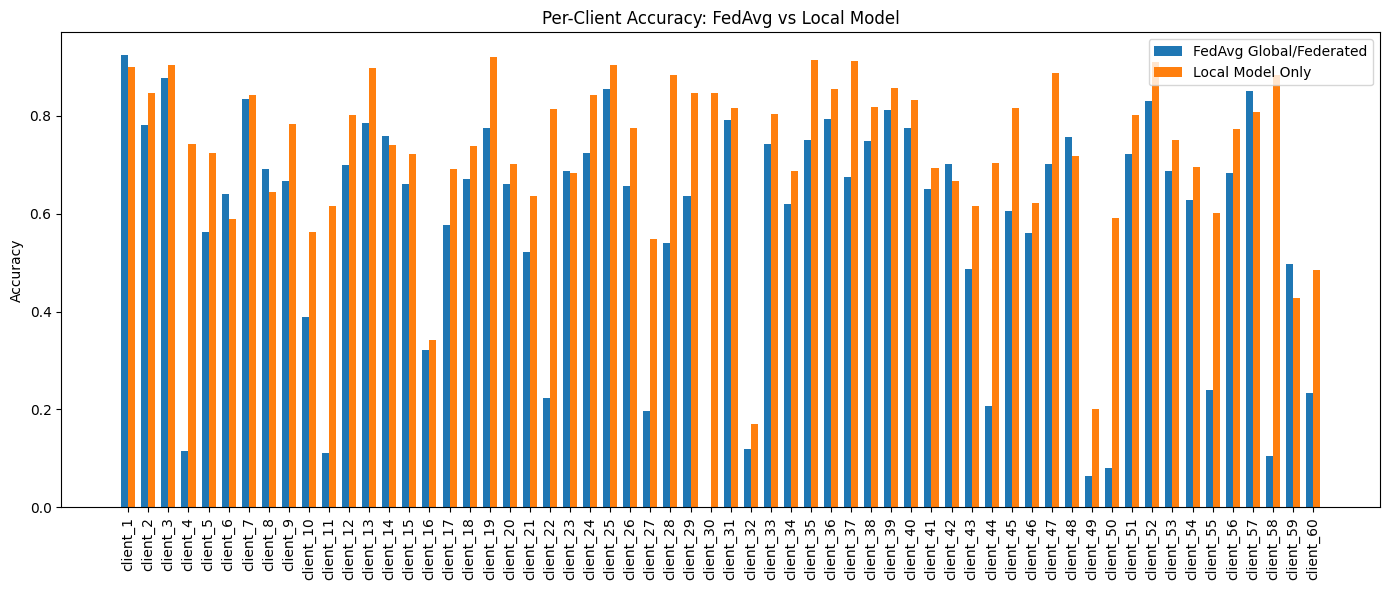

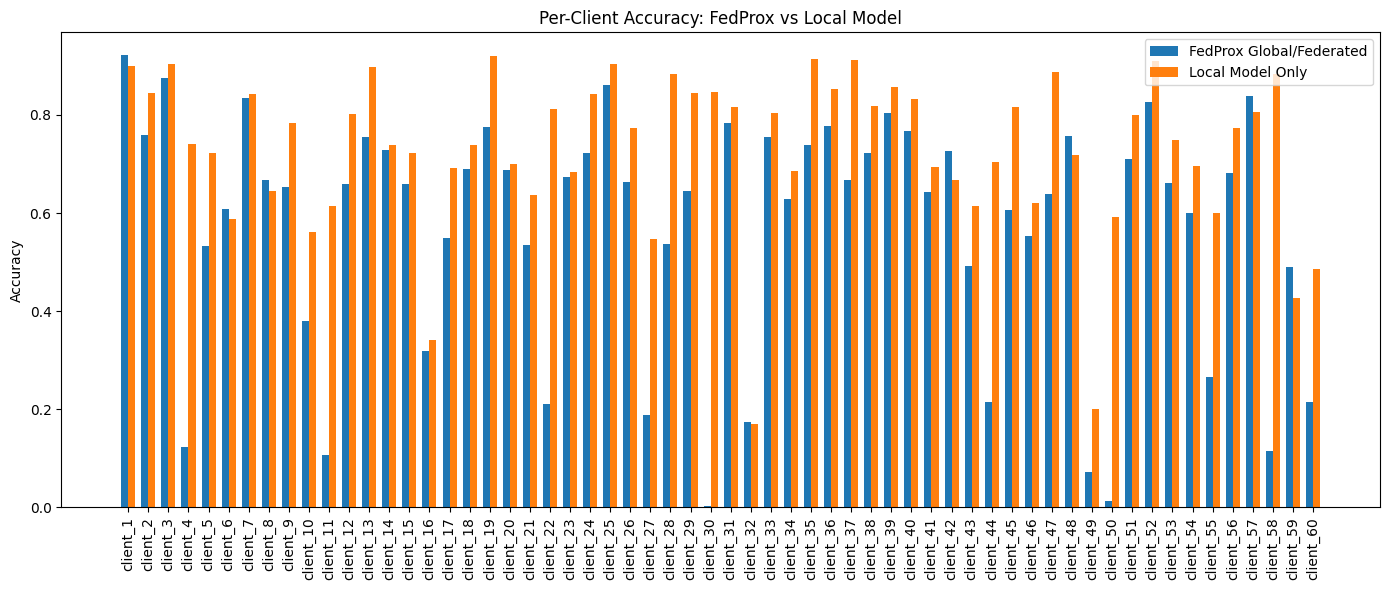

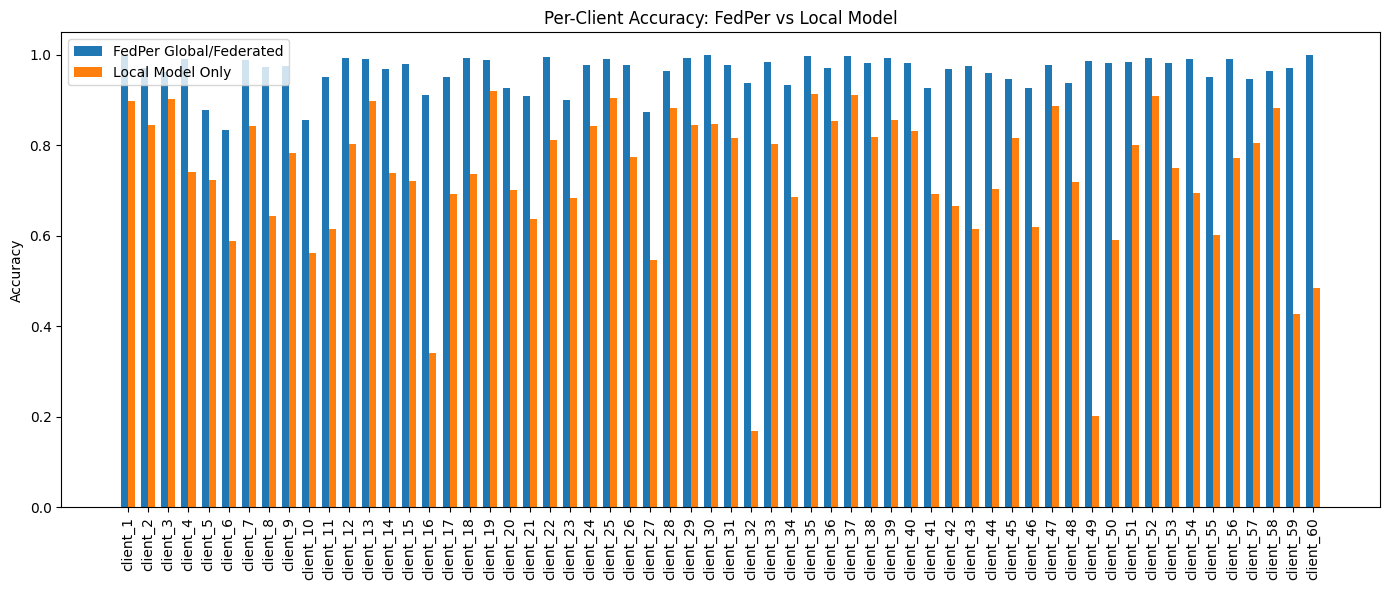

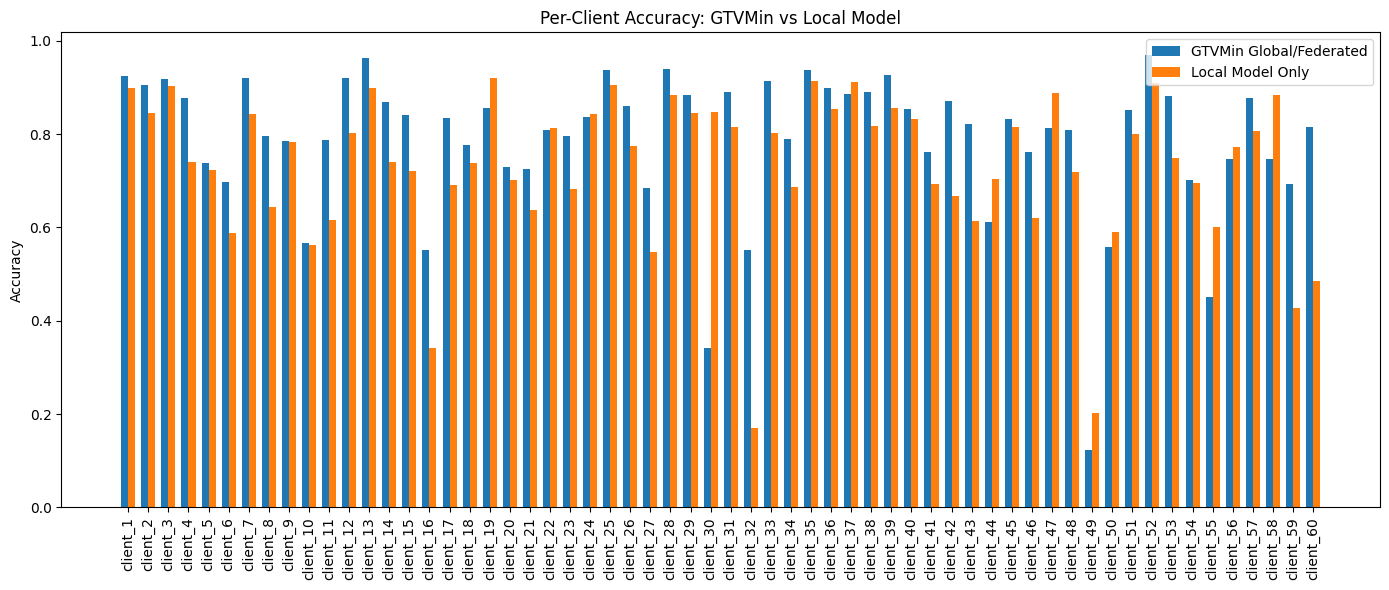

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Assumes: results (accuracy) and local_models_gtv, client_loaders, etc. already exist

# Step 1: Compute "local only" accuracy for each client
local_only_accuracies = {}
for uid in client_loaders:
    # Train model only on local data (no global model involved)
    model = FedAvgMLP(input_dim, hidden_dim, num_classes)
    local_train(model, client_loaders[uid], lr=0.01, epochs=1)
    acc = evaluate_model(model, client_loaders[uid])
    local_only_accuracies[uid] = acc

# Step 2: Plot global vs local for each method
methods = ['FedAvg', 'FedProx', 'FedPer', 'GTVMin']
uids_sorted = sorted(local_only_accuracies, key=lambda x: int(x.split('_')[1]))
x = np.arange(len(uids_sorted))
bar_width = 0.35

for method in methods:
    plt.figure(figsize=(14, 6))
    global_vals = [results[method].get(uid, np.nan) for uid in uids_sorted]
    local_vals = [local_only_accuracies.get(uid, np.nan) for uid in uids_sorted]

    plt.bar(x - bar_width/2, global_vals, bar_width, label=f'{method} Global/Federated')
    plt.bar(x + bar_width/2, local_vals, bar_width, label='Local Model Only')

    plt.xticks(x, uids_sorted, rotation=90)
    plt.ylabel('Accuracy')
    plt.title(f'Per-Client Accuracy: {method} vs Local Model')
    plt.legend()
    plt.tight_layout()
    plt.show()


## Analyze a Specific Situation (Confusion Matrix Analysis for All 4 FL Methods)

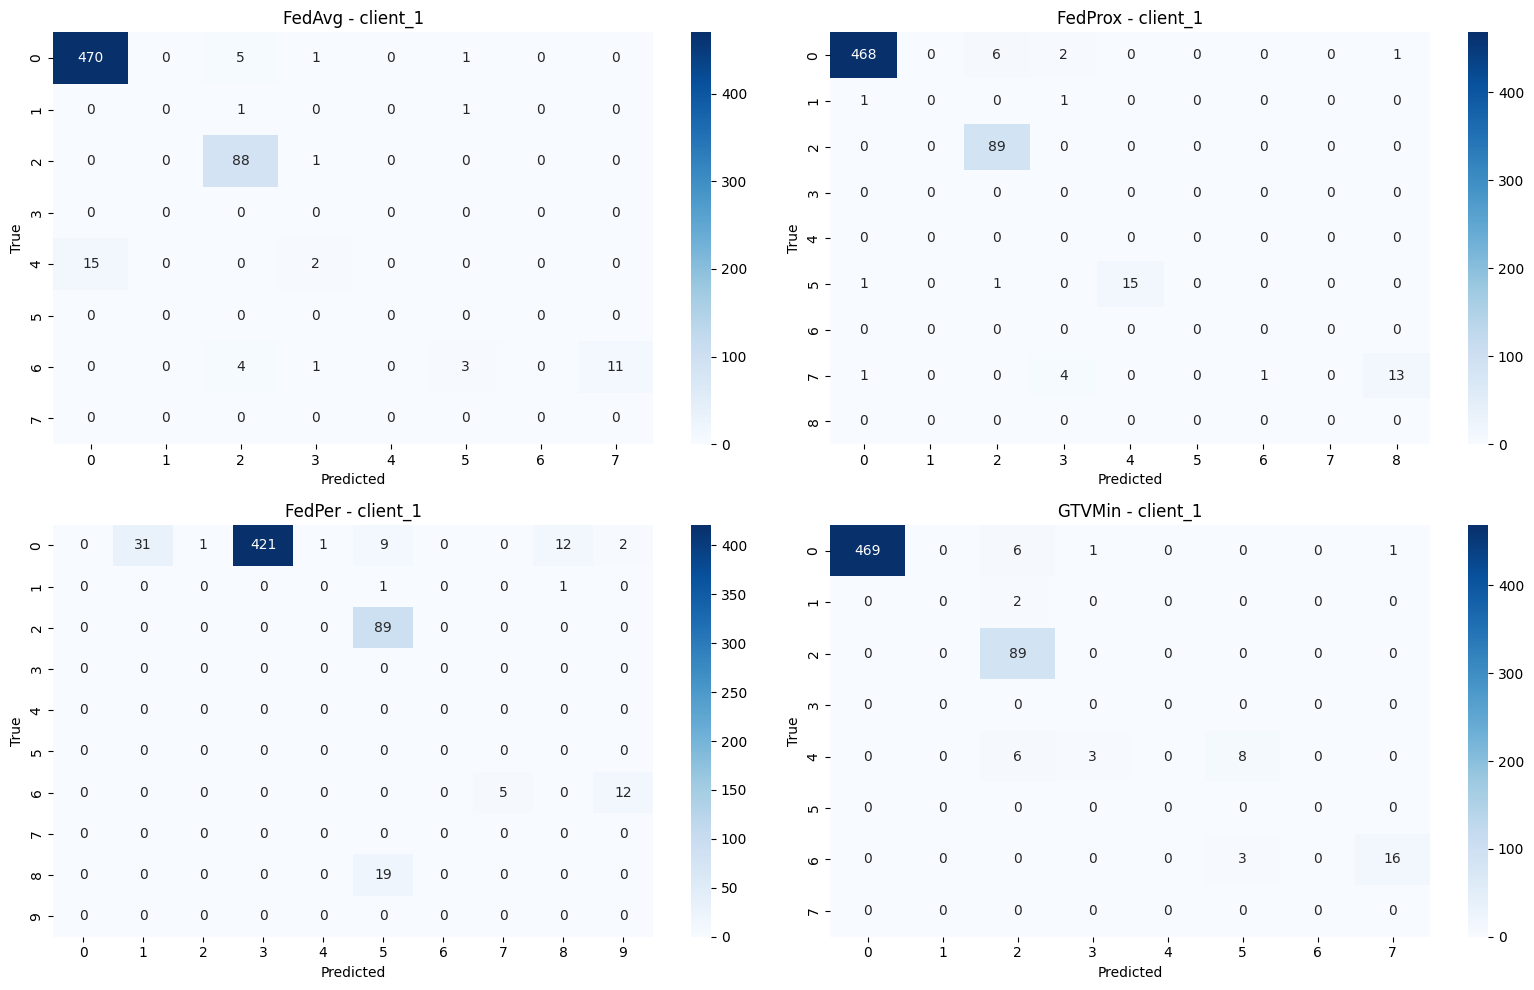

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Container to store confusion matrices per method
conf_matrices = {
    'FedAvg': {},
    'FedProx': {},
    'FedPer': {},
    'GTVMin': {}
}

# Generate confusion matrices
for method in conf_matrices:
    for uid in client_loaders:
        model = None

        if method == 'FedAvg':
            model = model_fedavg
        elif method == 'FedProx':
            model = model_fedprox
        elif method == 'FedPer':
            model = FedPerModel(input_dim, hidden_dim, num_classes)
            model.set_shared_params(model_shared.get_shared_params())
        elif method == 'GTVMin':
            model = local_models_gtv.get(uid, None)

        if model:
            model.eval()
            true_labels = []
            pred_labels = []
            with torch.no_grad():
                for X_batch, y_batch in client_loaders[uid]:
                    y_pred = torch.argmax(model(X_batch), dim=1)
                    pred_labels.extend(y_pred.numpy())
                    true_labels.extend(y_batch.numpy())
            conf_matrices[method][uid] = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrices for a selected client across all methods
uid_to_plot = sorted(client_loaders.keys(), key=lambda x: int(x.split('_')[1]))[0]  # e.g., 'client_1'

plt.figure(figsize=(16, 10))
for idx, method in enumerate(conf_matrices):
    if uid_to_plot in conf_matrices[method]:
        plt.subplot(2, 2, idx + 1)
        sns.heatmap(conf_matrices[method][uid_to_plot], annot=True, fmt='d', cmap='Blues')
        plt.title(f'{method} - {uid_to_plot}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
plt.tight_layout()
plt.show()


## Calculate Precision, Recall, F1-Score for Each Client

In [113]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Store scores per client per method
client_metrics = {
    'FedAvg': {},
    'FedProx': {},
    'FedPer': {},
    'GTVMin': {}
}

for method in client_metrics:
    for uid in client_loaders:
        model = None

        if method == 'FedAvg':
            model = model_fedavg
        elif method == 'FedProx':
            model = model_fedprox
        elif method == 'FedPer':
            model = FedPerModel(input_dim, hidden_dim, num_classes)
            model.set_shared_params(model_shared.get_shared_params())
        elif method == 'GTVMin':
            model = local_models_gtv.get(uid, None)

        if model:
            model.eval()
            true_labels = []
            pred_labels = []
            with torch.no_grad():
                for X_batch, y_batch in client_loaders[uid]:
                    y_pred = torch.argmax(model(X_batch), dim=1)
                    pred_labels.extend(y_pred.numpy())
                    true_labels.extend(y_batch.numpy())

            # Now calculate metrics for this client
            precision = precision_score(true_labels, pred_labels, average='macro', zero_division=0)
            recall = recall_score(true_labels, pred_labels, average='macro', zero_division=0)
            f1 = f1_score(true_labels, pred_labels, average='macro', zero_division=0)

            client_metrics[method][uid] = {
                'precision': precision,
                'recall': recall,
                'f1_score': f1
            }


In [114]:
for method in client_metrics:
    print(f"\nMethod: {method}")
    for uid, metrics in client_metrics[method].items():
        print(f"Client: {uid}, Precision: {metrics['precision']:.4f}, Recall: {metrics['recall']:.4f}, F1-Score: {metrics['f1_score']:.4f}")



Method: FedAvg
Client: client_50, Precision: 0.1593, Recall: 0.0249, F1-Score: 0.0431
Client: client_2, Precision: 0.1738, Recall: 0.1615, F1-Score: 0.1671
Client: client_56, Precision: 0.3182, Recall: 0.2877, F1-Score: 0.2438
Client: client_8, Precision: 0.3389, Recall: 0.3071, F1-Score: 0.2865
Client: client_7, Precision: 0.1712, Recall: 0.2166, F1-Score: 0.1770
Client: client_37, Precision: 0.1436, Recall: 0.1864, F1-Score: 0.1514
Client: client_52, Precision: 0.3058, Recall: 0.3090, F1-Score: 0.2985
Client: client_47, Precision: 0.2466, Recall: 0.2331, F1-Score: 0.2160
Client: client_39, Precision: 0.0999, Recall: 0.1017, F1-Score: 0.1005
Client: client_54, Precision: 0.1207, Recall: 0.1493, F1-Score: 0.1322
Client: client_59, Precision: 0.2611, Recall: 0.1619, F1-Score: 0.1616
Client: client_57, Precision: 0.2617, Recall: 0.2396, F1-Score: 0.2309
Client: client_60, Precision: 0.2354, Recall: 0.1243, F1-Score: 0.1448
Client: client_51, Precision: 0.2158, Recall: 0.2159, F1-Score: 

## Visualize F1-Scores Across Clients

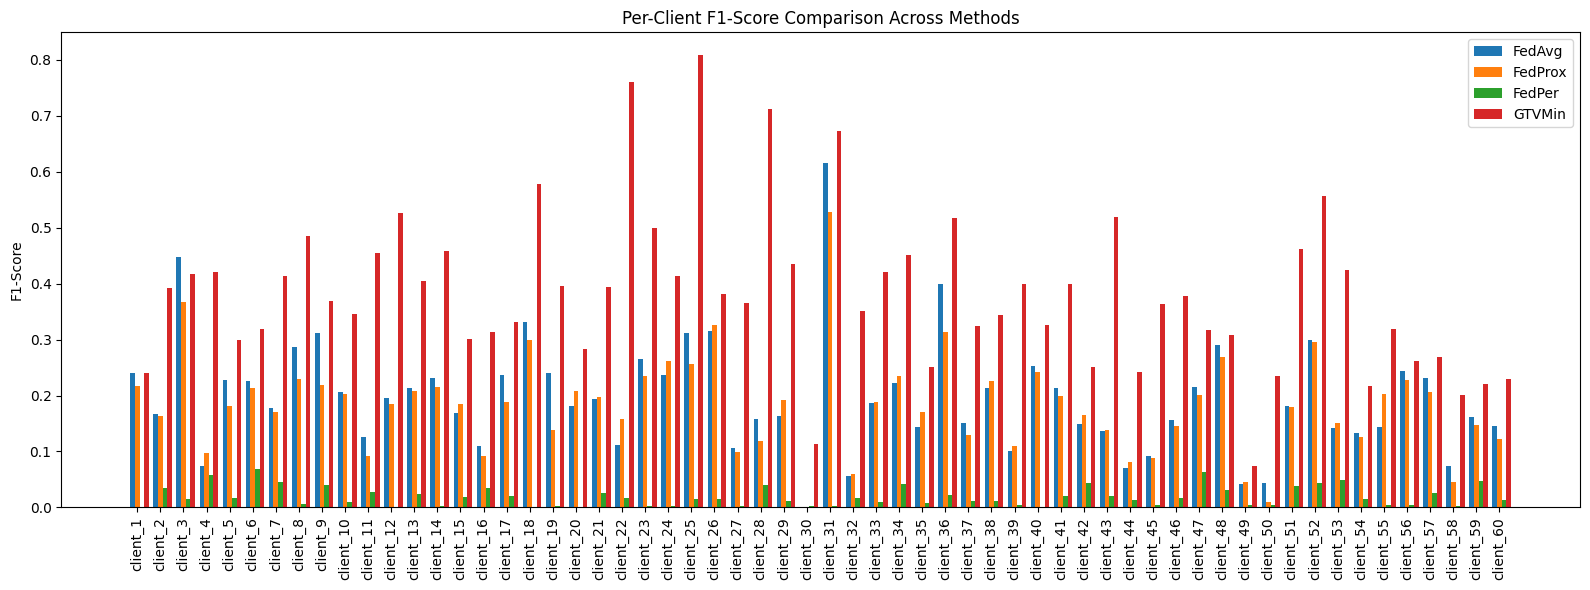

In [115]:
import matplotlib.pyplot as plt
import numpy as np

uids_sorted = sorted(client_loaders.keys(), key=lambda x: int(x.split('_')[1]))
x = np.arange(len(uids_sorted))
bar_width = 0.2

plt.figure(figsize=(16, 6))
for i, method in enumerate(client_metrics.keys()):
    vals = [client_metrics[method].get(uid, {}).get('f1_score', np.nan) for uid in uids_sorted]
    plt.bar(x + i * bar_width, vals, bar_width, label=method)

plt.xticks(x + bar_width, uids_sorted, rotation=90)
plt.ylabel('F1-Score')
plt.title('Per-Client F1-Score Comparison Across Methods')
plt.legend()
plt.tight_layout()
plt.show()


## [link text](https://\)Visualize Top 5 Clients per Method by F1-Score

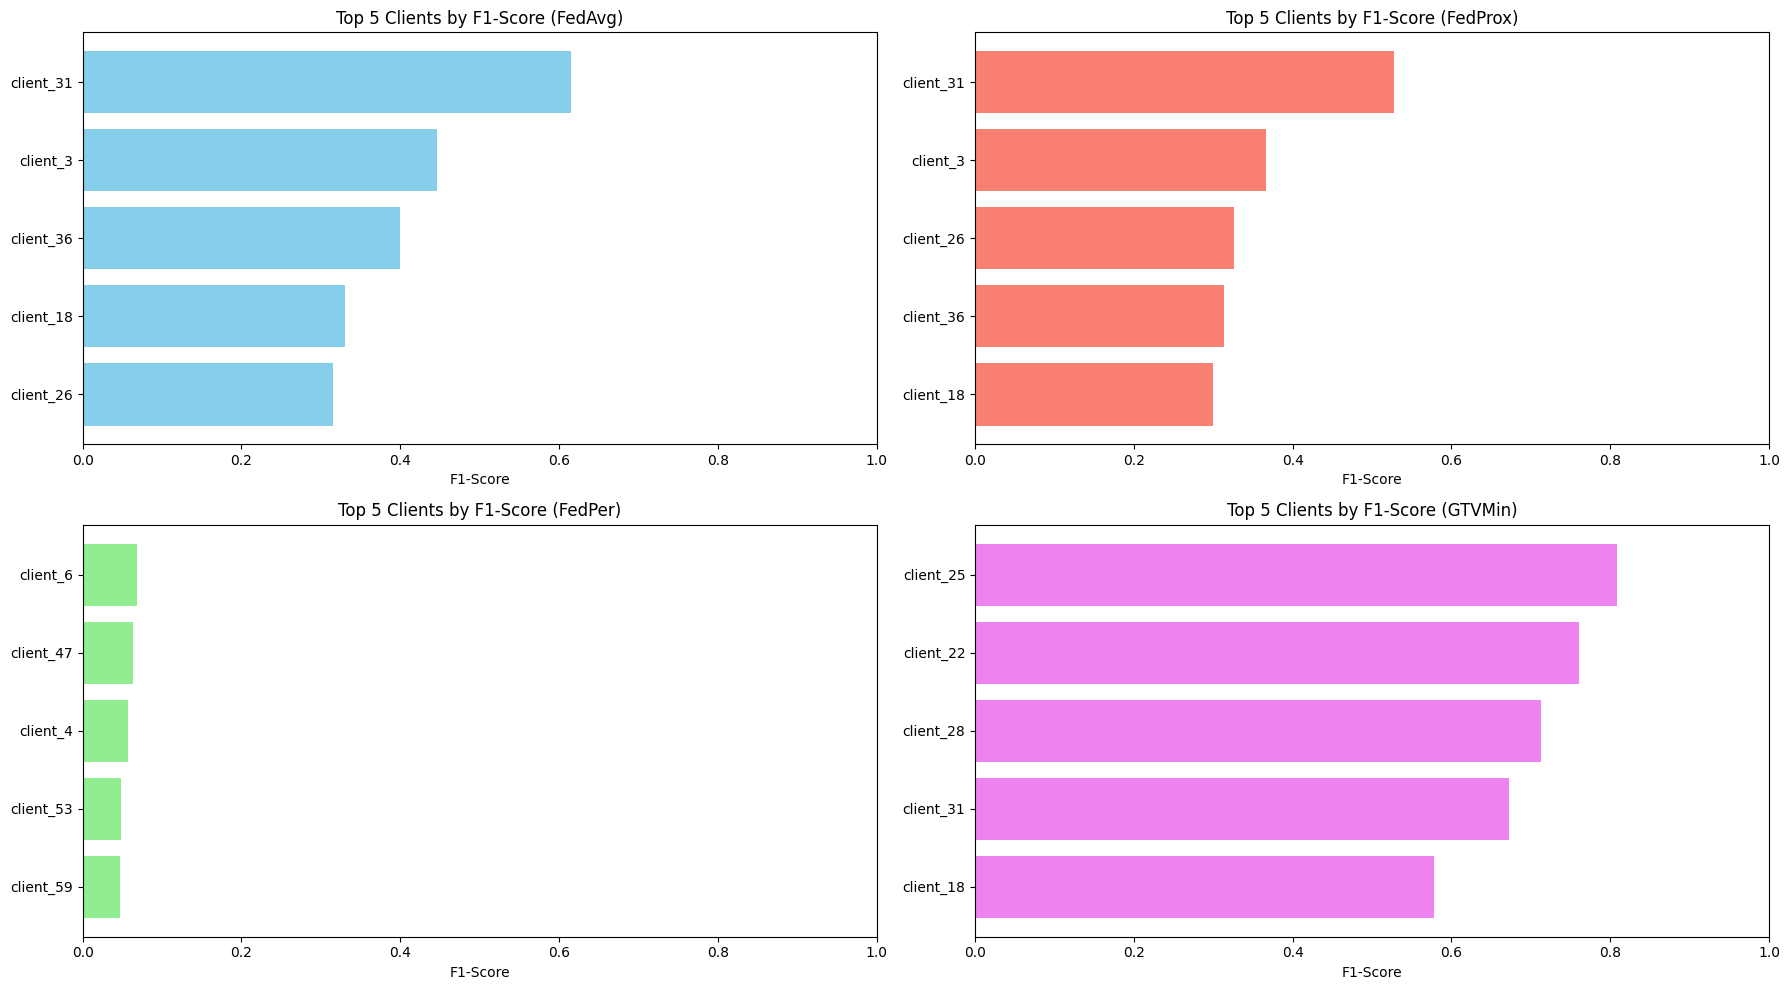

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Sort and get top 5 clients per method
top5_clients_per_method = {}

for method in client_metrics:
    sorted_clients = sorted(
        client_metrics[method].items(),
        key=lambda item: item[1]['f1_score'],
        reverse=True
    )
    top5_clients_per_method[method] = sorted_clients[:5]  # take top 5

# Step 2: Prepare plotting
bar_width = 0.4
colors = ['skyblue', 'salmon', 'lightgreen', 'violet']

plt.figure(figsize=(18, 10))

for idx, (method, client_list) in enumerate(top5_clients_per_method.items()):
    clients = [uid for uid, _ in client_list]
    scores = [metrics['f1_score'] for _, metrics in client_list]

    plt.subplot(2, 2, idx + 1)
    plt.barh(clients, scores, color=colors[idx])
    plt.xlabel('F1-Score')
    plt.title(f'Top 5 Clients by F1-Score ({method})')
    plt.xlim(0, 1)
    plt.gca().invert_yaxis()  # Best client at top

plt.tight_layout()
plt.show()


## Compare Across Algorithms Table for Best Client per Method

1



In [66]:
import pandas as pd

# Step 1: Find the best client for each method
best_clients_summary = {
    'Method': [],
    'Best Client': [],
    'Best F1-Score': []
}

for method in client_metrics:
    # Sort clients by F1-Score descending
    sorted_clients = sorted(
        client_metrics[method].items(),
        key=lambda item: item[1]['f1_score'],
        reverse=True
    )
    # Take the top 1 client
    best_client, best_scores = sorted_clients[0]
    best_clients_summary['Method'].append(method)
    best_clients_summary['Best Client'].append(best_client)
    best_clients_summary['Best F1-Score'].append(best_scores['f1_score'])

# Step 2: Create DataFrame
best_clients_df = pd.DataFrame(best_clients_summary)

# Step 3: Display the table
print(best_clients_df)

# Step 4: Optional — Save it to CSV
best_clients_df.to_csv("best_clients_per_method.csv", index=False)


    Method Best Client  Best F1-Score
0   FedAvg   client_52       0.354888
1  FedProx   client_52       0.350588
2   FedPer   client_55       0.083510
3   GTVMin   client_25       0.550098


## Function to Estimate Communication Cost

In [122]:
def get_model_size_mb(model):
    total_params = sum(p.numel() for p in model.parameters())
    size_bytes = total_params * 4  # float32 = 4 bytes
    return size_bytes / (1024 * 1024)


In [123]:
num_clients = len(client_loaders)
num_rounds = 5  # Adjust if different
comm_costs = {}

# Shared layer only for FedPer
fedper_shared_model = model_shared.shared if hasattr(model_shared, "shared") else model_shared

method_models = {
    'FedAvg': model_fedavg,
    'FedProx': model_fedprox,
    'FedPer': fedper_shared_model,
    'GTVMin': model_fedavg  # You can use average model or any client model
}

for method, model in method_models.items():
    model_size = get_model_size_mb(model)
    # Each round: upload + download
    total_cost = num_clients * num_rounds * 2 * model_size
    comm_costs[method] = total_cost


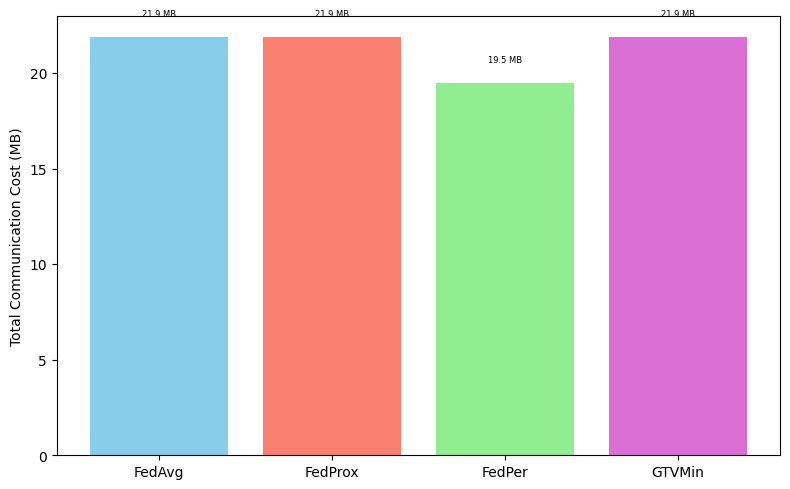

In [126]:
import matplotlib.pyplot as plt

methods = list(comm_costs.keys())
values = [comm_costs[m] for m in methods]

plt.figure(figsize=(8, 5))
bars = plt.bar(methods, values, color=['skyblue', 'salmon', 'lightgreen', 'orchid'])
plt.ylabel("Total Communication Cost (MB)")
#plt.title("Communication Cost per FL Method over 5 Rounds")

# Annotate bar values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f} MB", ha='center', va='bottom', fontsize=6)

plt.tight_layout()
plt.show()


## Evaluate Accuracy, Precision, Recall, and F1-Score for each Situation label

In [127]:
from sklearn.metrics import classification_report

def evaluate_per_situation(true_labels, pred_labels, label_encoder):
    target_names = label_encoder.inverse_transform(sorted(set(true_labels) | set(pred_labels)))

    report = classification_report(
        true_labels,
        pred_labels,
        target_names=target_names,
        zero_division=0,
        output_dict=True
    )

    df = pd.DataFrame(report).transpose()
    df = df[['precision', 'recall', 'f1-score', 'support']]
    return df


In [128]:
# Example for one client and one method
method = 'FedAvg'
uid = 'client_1'
model = model_fedavg  # or your GTVMin local model like local_models_gtv[uid]

true_labels, pred_labels = [], []

model.eval()
with torch.no_grad():
    for X, y in client_loaders[uid]:
        preds = torch.argmax(model(X), dim=1)
        true_labels.extend(y.numpy())
        pred_labels.extend(preds.numpy())

# Get per-situation scores
situation_report_df = evaluate_per_situation(true_labels, pred_labels, label_enc_sit)
print(situation_report_df)


                       precision    recall  f1-score     support
LYING-SLEEPING          0.969072  0.985325  0.977131  477.000000
LYING-WATCHING_TV       0.000000  0.000000  0.000000    2.000000
SITTING-COMPUTER_WORK   0.897959  0.988764  0.941176   89.000000
SITTING-TALKING         0.000000  0.000000  0.000000    0.000000
STANDING-COOKING        0.000000  0.000000  0.000000   17.000000
STANDING-TALKING        0.000000  0.000000  0.000000    0.000000
WALKING-SHOPPING        0.000000  0.000000  0.000000   19.000000
WALKING-TALKING         0.000000  0.000000  0.000000    0.000000
accuracy                0.923841  0.923841  0.923841    0.923841
macro avg               0.233379  0.246761  0.239788  604.000000
weighted avg            0.897625  0.923841  0.910358  604.000000


## Evaluate Accuracy, Precision, Recall, and F1-Score for each Situation label

In [129]:
from sklearn.metrics import classification_report

def evaluate_per_situation_aggregate(method_model_dict, client_loaders, label_encoder):
    all_true = []
    all_pred = []

    for uid in client_loaders:
        model = method_model_dict.get(uid)
        if model is None:
            continue

        model.eval()
        with torch.no_grad():
            for X, y in client_loaders[uid]:
                preds = torch.argmax(model(X), dim=1)
                all_true.extend(y.numpy())
                all_pred.extend(preds.numpy())

    # Create per-class report
    target_names = label_encoder.inverse_transform(
        sorted(set(all_true) | set(all_pred))
    )

    report = classification_report(
        all_true, all_pred,
        target_names=target_names,
        zero_division=0,
        output_dict=True
    )

    df = pd.DataFrame(report).transpose()
    df = df[['precision', 'recall', 'f1-score', 'support']]
    return df


In [130]:
# For FedAvg, FedProx → use shared model
# For FedPer and GTVMin → use client-specific models

# For FedAvg
method_model_dict_fedavg = {uid: model_fedavg for uid in client_loaders}

# For FedProx
method_model_dict_fedprox = {uid: model_fedprox for uid in client_loaders}

# For FedPer
method_model_dict_fedper = {
    uid: FedPerModel(input_dim, hidden_dim, num_classes)
    for uid in client_loaders
}
# Load shared base into each FedPer client model
for uid in method_model_dict_fedper:
    method_model_dict_fedper[uid].set_shared_params(model_shared.get_shared_params())
    local_train(method_model_dict_fedper[uid], client_loaders[uid], lr=0.01, epochs=1)

# GTVMin already has local_models_gtv

# Now evaluate
df_fedavg = evaluate_per_situation_aggregate(method_model_dict_fedavg, client_loaders, label_enc_sit)
df_fedprox = evaluate_per_situation_aggregate(method_model_dict_fedprox, client_loaders, label_enc_sit)
df_fedper = evaluate_per_situation_aggregate(method_model_dict_fedper, client_loaders, label_enc_sit)
df_gtvmin = evaluate_per_situation_aggregate(local_models_gtv, client_loaders, label_enc_sit)


In [131]:
print("FedAvg\n", df_fedavg)
print("FedProx\n", df_fedprox)
print("FedPer\n", df_fedper)
print("GTVMin\n", df_gtvmin)


FedAvg
                               precision    recall  f1-score        support
LYING-SLEEPING                 0.762721  0.947471  0.845117   80698.000000
LYING-SURFING_THE_INTERNET     0.000000  0.000000  0.000000    1992.000000
LYING-WATCHING_TV              0.000000  0.000000  0.000000    1845.000000
RUNNING-EXERCISE               0.358333  0.047461  0.083821     906.000000
SITTING-COMPUTER_WORK          0.497016  0.520588  0.508529   26714.000000
SITTING-LAB_WORK               0.000000  0.000000  0.000000    1617.000000
SITTING-SURFING_THE_INTERNET   0.318841  0.003140  0.006218    7007.000000
SITTING-TALKING                0.297527  0.428246  0.351115   10536.000000
SITTING-WATCHING_TV            0.528373  0.173432  0.261146    5691.000000
STANDING-COMPUTER_WORK         0.000000  0.000000  0.000000    1873.000000
STANDING-COOKING               0.000000  0.000000  0.000000    1760.000000
STANDING-EXERCISE              0.000000  0.000000  0.000000    1124.000000
STANDING-LAB_WORK

## Plot Per-Situation F1 Comparison

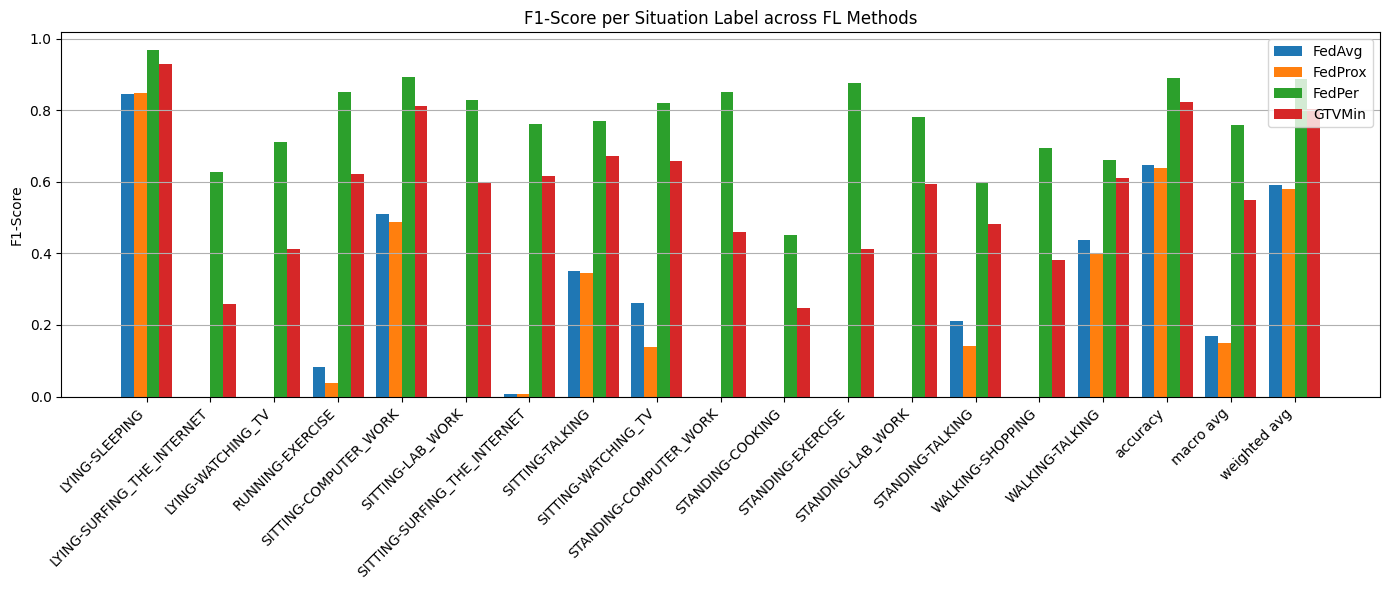

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure alignment on labels
common_labels = sorted(
    set(df_fedavg.index) &
    set(df_fedprox.index) &
    set(df_fedper.index) &
    set(df_gtvmin.index)
)

# Extract F1 scores per method
fedavg_f1 = df_fedavg.loc[common_labels, 'f1-score']
fedprox_f1 = df_fedprox.loc[common_labels, 'f1-score']
fedper_f1 = df_fedper.loc[common_labels, 'f1-score']
gtvmin_f1 = df_gtvmin.loc[common_labels, 'f1-score']

# Plotting
x = np.arange(len(common_labels))
bar_width = 0.2

plt.figure(figsize=(14, 6))
plt.bar(x - 1.5*bar_width, fedavg_f1, bar_width, label='FedAvg')
plt.bar(x - 0.5*bar_width, fedprox_f1, bar_width, label='FedProx')
plt.bar(x + 0.5*bar_width, fedper_f1, bar_width, label='FedPer')
plt.bar(x + 1.5*bar_width, gtvmin_f1, bar_width, label='GTVMin')

plt.xticks(x, common_labels, rotation=45, ha='right')
plt.ylabel('F1-Score')
plt.title('F1-Score per Situation Label across FL Methods')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
